<a href="https://colab.research.google.com/github/Aspire-Mayank/EIP4/blob/master/Session1/Assignment1/Day1_Background_and_basics_of_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries and modules**

In [1]:
# https://keras.io/
%tensorflow_version 1.x
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

###Load pre-Shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


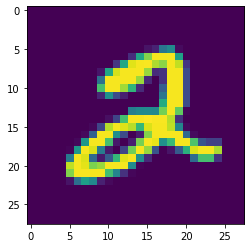

In [4]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#convert 1-D class arrays to 10-D class metrics
Y_train = np_utils.to_categorical(y_train, 10)
Y_test =  np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(Convolution2D(32, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,3,3, activation='relu'))
#model.add(Convolution2D(32,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10 , 1, 1, activation='relu'))
model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app


In [26]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 10)         

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, validation_data=(X_test, Y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  512/60000 [..............................] - ETA: 21s - loss: 0.0218 - acc: 0.9902

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 22s 366us/step - loss: 0.0170 - acc: 0.9942 - val_loss: 0.0323 - val_acc: 0.9905
Epoch 2/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0155 - acc: 0.9947 - val_loss: 0.0276 - val_acc: 0.9921
Epoch 3/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0131 - acc: 0.9956 - val_loss: 0.0336 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0480 - val_acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0264 - val_acc: 0.9933
Epoch 6/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0119 - acc: 0.9959 - val_loss: 0.0365 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0095 - acc: 0.9967 - val_loss: 0.0373 - val_acc: 0.9909
Epoch 8/10
60000/60000 [==============

In [33]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 107us/step


In [34]:
print(score)

[0.03870472356888435, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [37]:
print(y_pred[:9])
print(y_test[:9])

[[1.1785687e-19 1.6571452e-15 3.8364845e-12 5.4936711e-10 4.3572748e-24
  2.2506326e-21 1.1687171e-30 1.0000000e+00 3.5284409e-16 9.8535693e-12]
 [4.8130240e-18 6.0282812e-17 1.0000000e+00 1.4176583e-23 2.3547021e-16
  3.8778773e-33 2.5693309e-15 1.1301252e-25 1.9466109e-19 5.1910896e-27]
 [1.6275615e-16 9.9999988e-01 2.5250467e-08 7.4189163e-13 9.6049185e-08
  2.9686933e-10 9.3494346e-10 6.2974138e-08 5.0490150e-09 1.3041844e-10]
 [1.0000000e+00 2.0110243e-27 1.6086175e-17 1.3725160e-17 3.2461992e-18
  3.0635534e-15 9.0367260e-09 7.7525370e-21 2.6728522e-16 3.5331163e-15]
 [1.0240093e-18 7.8898743e-26 2.7611495e-16 4.2643071e-21 9.9999595e-01
  2.5948061e-19 3.7505335e-17 7.8424455e-23 3.0636959e-13 3.9970196e-06]
 [6.1025770e-16 9.9999964e-01 2.8877622e-07 5.4974341e-13 5.9943574e-08
  2.2870484e-12 9.0199070e-11 5.9995621e-08 1.6829388e-08 5.3154713e-11]
 [1.2323330e-28 3.5281143e-18 1.7331779e-16 2.0950352e-23 1.0000000e+00
  4.2811864e-17 5.7914033e-22 6.7698686e-18 5.4992084e-13 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

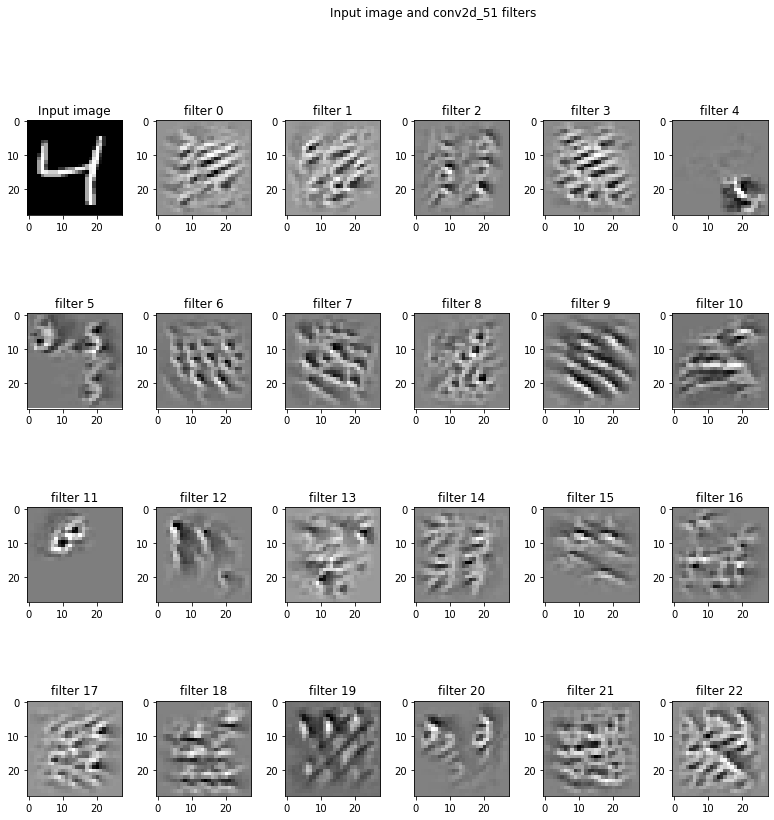

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_51'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()
